# Salary Prediction using Linear Regression:

To detemine the salary for new employee in a company we are building a model based on the present employees GPA,Experience.

##### Import the libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mydata=pd.read_excel("Salary_lm (6).xlsx")

In [3]:
mydata

,Student,School_Ranking,GPA,Experience,Salary
0,1,78.000000,2.92,3,73590
1,2,56.000000,3.84,9,87000
2,3,23.000000,3.04,6,76970
3,4,67.000000,3.20,6,79320
4,5,56.000000,3.61,7,79530
...,...,...,...,...,...
109,110,302.333333,3.95,3,50479
110,111,305.833333,3.96,5,58497
111,112,309.333333,3.97,5,49675
112,113,312.833333,3.98,4,56909


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student         114 non-null    int64  
 1   School_Ranking  114 non-null    float64
 2   GPA             114 non-null    float64
 3   Experience      114 non-null    int64  
 4   Salary          114 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.6 KB


In [5]:
mydata.describe()

,Student,School_Ranking,GPA,Experience,Salary
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,57.500000,143.283626,3.487544,5.026316,61600.333333
std,33.052988,87.372728,0.303220,1.525364,13318.907116
min,1.000000,15.000000,2.760000,2.000000,45074.000000
25%,29.250000,71.500000,3.250000,4.000000,50414.750000
50%,57.500000,118.583333,3.495000,5.000000,55233.000000
75%,85.750000,217.458333,3.757500,6.000000,76965.000000
max,114.000000,316.333333,3.990000,9.000000,87000.000000


In [6]:
mydata.isnull().sum()

Student           0
School_Ranking    0
GPA               0
Experience        0
Salary            0
dtype: int64

In [7]:
mydata_corr=mydata.corr()
mydata_corr

,Student,School_Ranking,GPA,Experience,Salary
Student,1.000000,0.948277,0.795718,-0.311117,-0.773404
School_Ranking,0.948277,1.000000,0.848395,-0.224579,-0.650048
GPA,0.795718,0.848395,1.000000,0.012960,-0.505421
Experience,-0.311117,-0.224579,0.012960,1.000000,0.569178
Salary,-0.773404,-0.650048,-0.505421,0.569178,1.000000


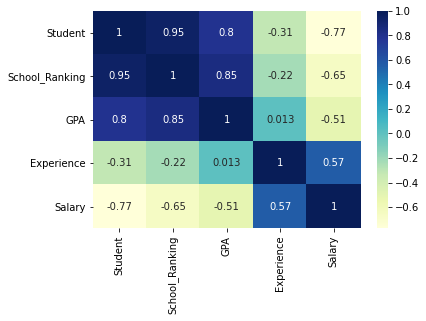

In [8]:
sns.heatmap(mydata_corr,annot=True,cmap='YlGnBu');

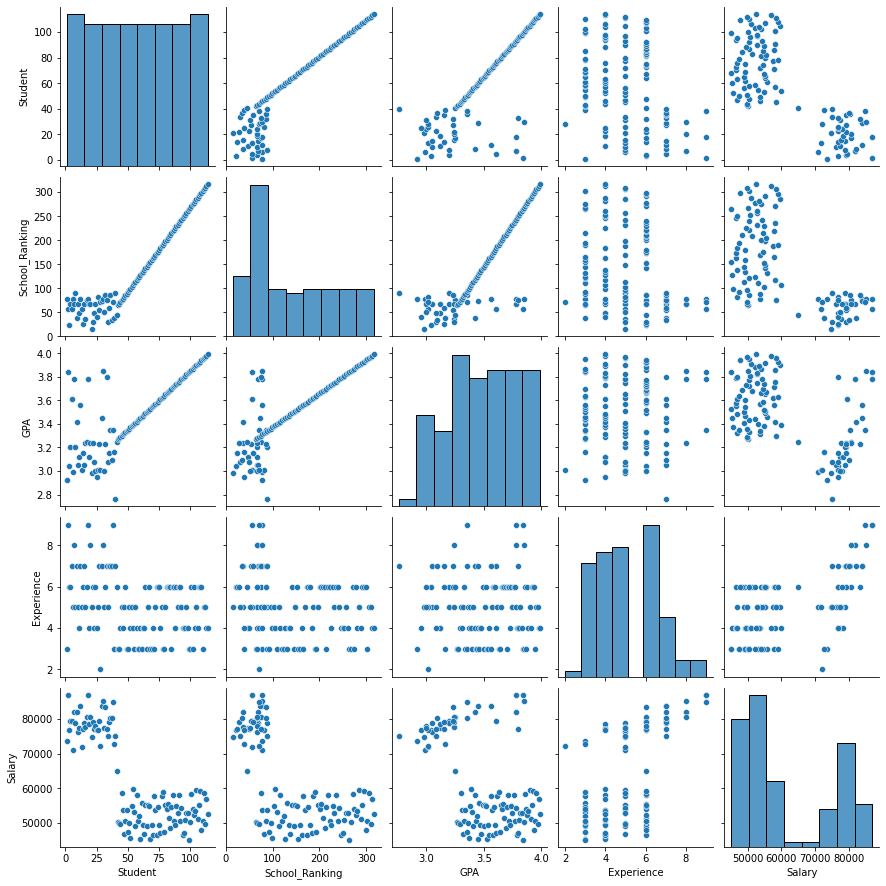

In [9]:
sns.pairplot(mydata);

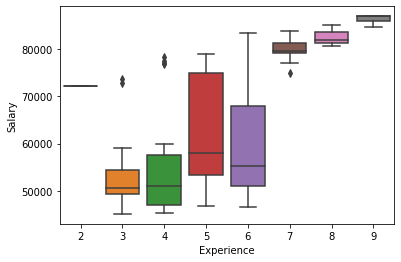

In [10]:
sns.boxplot(x="Experience",y="Salary",data=mydata);

In [11]:
y_dep=mydata.Salary

In [12]:
y_dep

0      73590
1      87000
2      76970
3      79320
4      79530
       ...  
109    50479
110    58497
111    49675
112    56909
113    52614
Name: Salary, Length: 114, dtype: int64

In [13]:
x_ind=mydata.drop("Salary",axis=1)

In [14]:
x_ind

,Student,School_Ranking,GPA,Experience
0,1,78.000000,2.92,3
1,2,56.000000,3.84,9
2,3,23.000000,3.04,6
3,4,67.000000,3.20,6
4,5,56.000000,3.61,7
...,...,...,...,...
109,110,302.333333,3.95,3
110,111,305.833333,3.96,5
111,112,309.333333,3.97,5
112,113,312.833333,3.98,4


# Linear regression 
 It is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis.Linear regression algorithms show a linear relationship between a dependent (y) and one or more independent (y) variables, hence called linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.


# Ordinary least square:
   Our main goal is to find the best fit line that means the error between predicted values and actual values should be minimized. The best fit line will have the least error.

Rˆ2 = 1 - SSR/SST

In [15]:
import statsmodels.api as sm

In [16]:
model=sm.OLS(y_dep,x_ind)

In [17]:
my_fit=model.fit()

In [18]:
my_fit.summary() # DB test - Autocorrelation and JB test - NOrmalility
                #)0- 4        2. 0 = normal 1 = not

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1829.
Date:                Tue, 24 Aug 2021   Prob (F-statistic):                    1.35e-99
Time:                        14:12:51   Log-Likelihood:                         -1181.5
No. Observations:                 114   AIC:                                      2371.
Df Residuals:                     110   BIC:                                      2382.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Student         -491.1361     74.067     -6.631      0.000    -637.919    -344.353
School_Ranking    28.3744     26.712      1.062      0.290     -24.563      81.311
GPA             2.106e+04   1175.160     17.922      0.000    1.87e+04    2.34e+04
Experience      2411.2350    557.505      4.325      0.000    1306.390    3516.080
==============================================================================
Omnibus:                        1.938   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.379   Jarque-Bera (JB):                1.859
Skew:                           0.228   Prob(JB):                        0.395
Kurtosis:                       2.572   Cond. No.                         316.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R-squared method:   Our Rˆ2 = 0.985, close to 1. It represent good model.
1.R-squared is a statistical method that determines the goodness of fit.
2.It measures the strength of the relationship between the dependent and independent variables on a scale of 0–100%.
3.The high value of R-square determines the less difference between the predicted values and actual values and hence represents a good model.
4.It is also called a coefficient of determination, or coefficient of multiple determination for multiple regression.

# Predict

In [19]:
# Student =7, sr=14,GPA=3.2,Exp=7 Salary=??
my_fit.predict([[7,14,3.2,7]]).round()

array([81235.])

#### Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

# Machine Learning

In [20]:
import sklearn   # sklearn -scikit learn lib used for machine learning in python

### Train and test split : 
   We are splitting the data into train and test to train the model and test our prediction using test data.We are splitting data into 70% to train and remaining to test data. 

In [21]:
from sklearn import model_selection   
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,train_size=0.8,random_state=1)

#### Importing linear model and linear regression

In [23]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [24]:
model=LinearRegression()

#### Fitting the model to our train dataset

In [25]:
model.fit(x_train,y_train) # using 80% of our data 

LinearRegression()

#### Prediction using test data:

In [26]:
y_pred=model.predict(x_test)

#### Predicted salary from the model:

In [27]:
y_pred

array([49228.74114116, 61320.96550611, 55906.0426896 , 57712.50785174,
       53559.96376718, 47063.12982815, 44535.68876232, 52295.79596727,
       73142.05199554, 54720.86450336, 57531.14570834, 49048.27353174,
       81420.03297898, 54103.15566339, 45799.85656223, 56447.44551785,
       54464.09088223, 48506.87070349, 52658.52025407, 55183.27771795,
       59156.24872708, 84775.42696172, 48686.44377892])

#### Accuracy:

In [28]:
model.score(x_test,y_test)

0.6650832410928953

#### Result:
Our predtiction accuracy  to the actual salary is 60%.We can optimize and remove  outlier and check linear assumptions to imporove the accuracy.

#### Create a dataframe using actual and predicted y test:

In [29]:
f_com=pd.DataFrame({"Actual":y_test,"Machine_predicted":y_pred})

In [30]:
f_com

,Actual,Machine_predicted
93,46552,49228.741141
44,58454,61320.965506
56,58142,55906.042690
82,51255,57712.507852
69,46459,53559.963767
105,51064,47063.129828
101,53972,44535.688762
58,52038,52295.795967
35,80400,73142.051996
38,72800,54720.864503


#### Residual:
   It is the difference between actual and predicted values.

# Residual 

In [31]:
Res=y_pred-y_test
Res

93      2676.741141
44      2866.965506
56     -2235.957310
82      6457.507852
69      7100.963767
105    -4000.870172
101    -9436.311238
58       257.795967
35     -7257.948004
38    -18079.135497
65      2299.145708
94      2079.273532
2       4450.032979
102     1870.155663
112   -11109.143438
53     -3397.554482
100    -3769.909118
97     -4418.129297
92     -1485.479746
42      5255.277718
74      9800.248727
17     -2224.573038
78      1253.443779
Name: Salary, dtype: float64

# Mean squrared error:
   It is the mean of the squared difference of actual vs predicted values.

In [32]:
from sklearn.metrics import mean_squared_error as ms

In [33]:
mean_sqr=ms(y_test,y_pred)
mean_sqr

40484562.61154111

#### Root mean square 
It is the root of MSE i.e Root of the mean difference of Actual and Predicted values. RMSE penalizes the large errors whereas MSE doesn’t.

In [34]:
# RMSE
root_mean_sqr=np.sqrt(mean_sqr)
root_mean_sqr

6362.748039294115

#### Bar graph for residual

In [35]:
com_g=f_com.head(23)

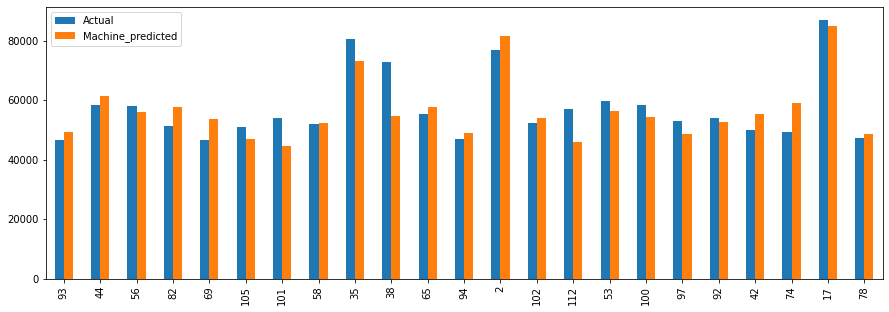

In [36]:
com_g.plot(kind="bar",figsize=(15,5));

C:\Users\Thulasidass\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Thulasidass\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


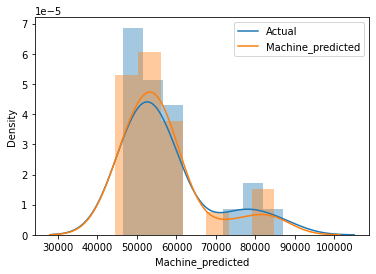

In [37]:
sns.distplot(f_com["Actual"])
sns.distplot(f_com["Machine_predicted"])
plt.legend(["Actual","Machine_predicted"])

##### Intercept and cofficient:

In [38]:
# y=b0+b1x1+b2x2....
# y is salary here 

In [39]:
model.intercept_

81295.62999837167

In [40]:
model.coef_

array([ -493.79607188,   108.68581212, -6707.18799454,  3249.3115035 ])

In [41]:
# Salary =81295-493.79(Student)+108.68(School_Ranking)-6707.18(GPA)+3249.31(Experience)

# Assumptions in Linear Regression

In [42]:
#Linearity 
#Homoscedastic
#no Autocorrelation
# Normality (error check )
# Multicollinearity

((array([-1.88541008, -1.46098765, -1.20134617, -1.00433937, -0.84016981,
         -0.69602799, -0.56509461, -0.44321873, -0.3276112 , -0.21623603,
         -0.10748795,  0.        ,  0.10748795,  0.21623603,  0.3276112 ,
          0.44321873,  0.56509461,  0.69602799,  0.84016981,  1.00433937,
          1.20134617,  1.46098765,  1.88541008]),
  array([-18079.13549664, -11109.14343777,  -9436.31123768,  -7257.94800446,
          -4418.12929651,  -4000.87017185,  -3769.90911777,  -3397.55448215,
          -2235.9573104 ,  -2224.57303828,  -1485.47974593,    257.79596727,
           1253.44377892,   1870.15566339,   2079.27353174,   2299.14570834,
           2676.74114116,   2866.96550611,   4450.03297898,   5255.27771795,
           6457.50785174,   7100.96376718,   9800.24872708])),
 (6582.6149516448095, -915.1069130260983, 0.9754936360937055))

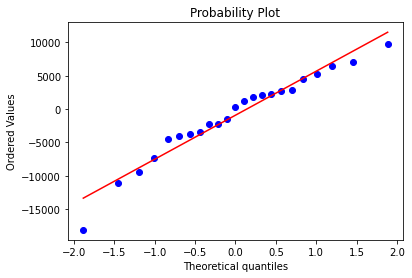

In [43]:
#Normality (error check)
import scipy.stats as st
st.probplot(Res,dist="norm",plot=plt)

C:\Users\Thulasidass\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

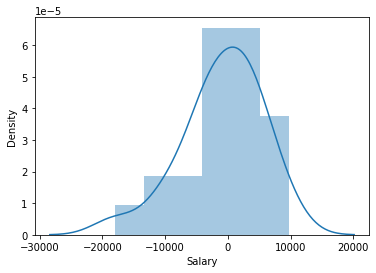

In [44]:
sns.distplot(Res)

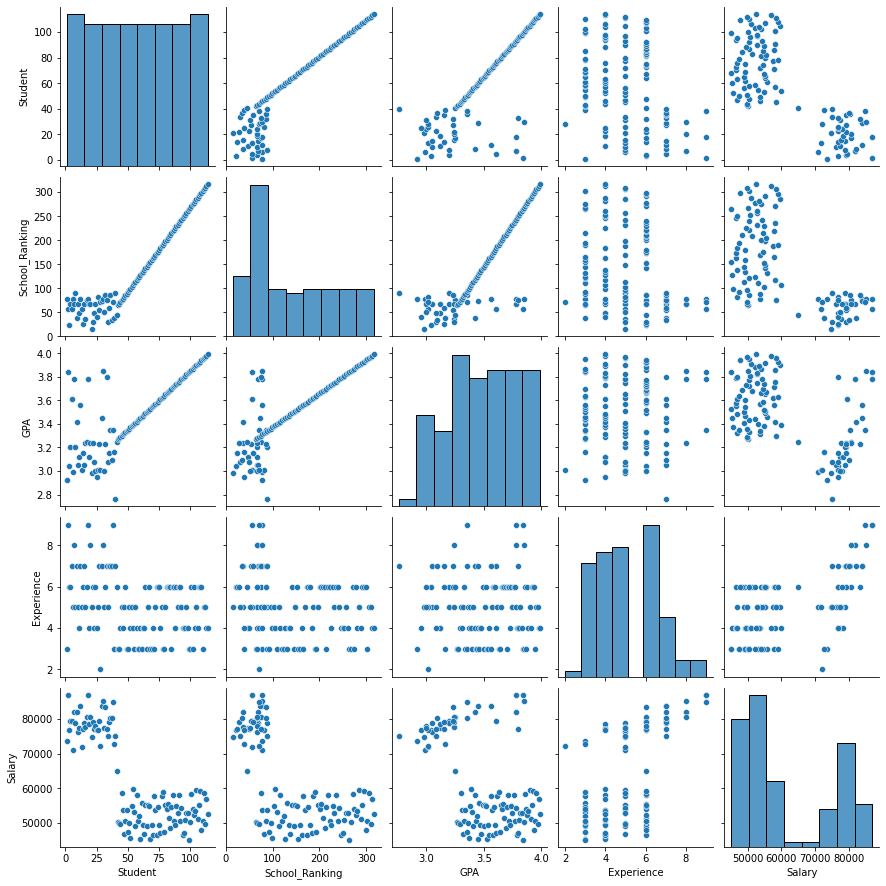

In [45]:
# Linearity 
sns.pairplot(mydata)

# Homoscedastic

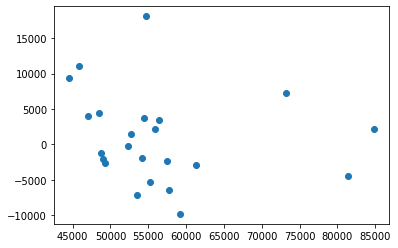

In [46]:
plt.plot(y_pred,y_test-y_pred,'o') #  i should not get a pattern

# No Autocorrelation

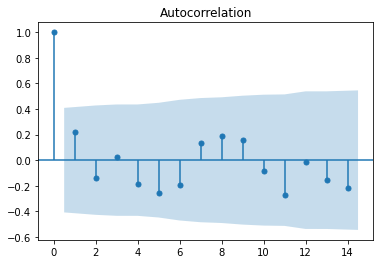

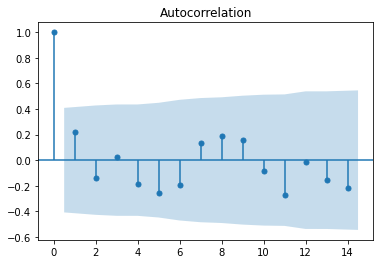

In [47]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(y_pred-y_test)

#  Multicollinearity

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vifm

In [55]:
def calculate_vif(x):
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF_Values']=[vifm(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [58]:
calculate_vif(mydata)

,features,VIF_Values
0,Student,63.029300
1,School_Ranking,37.877489
2,GPA,124.061950
3,Experience,18.750610
4,Salary,67.502098
